<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


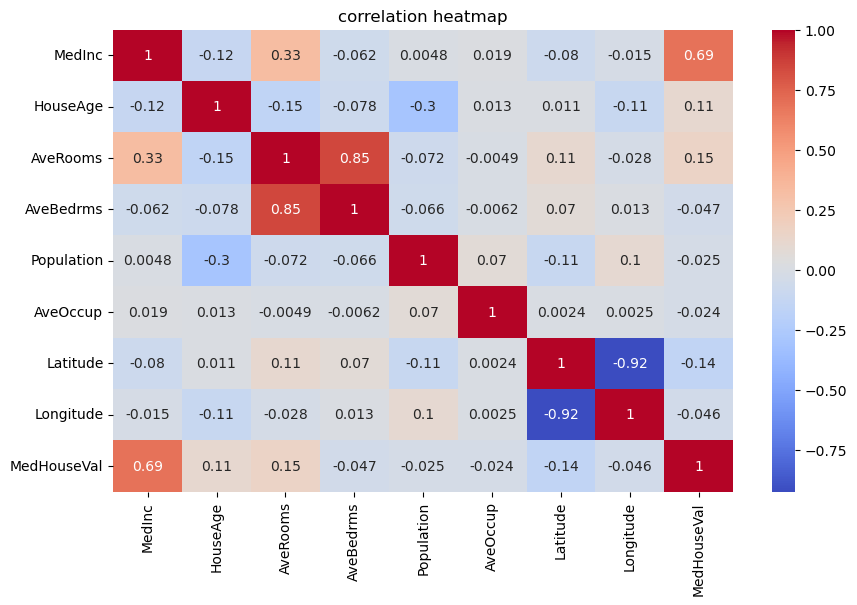

Mean Absolute Error (MAE): 0.5332001304956558
Root Mean Squared Error (RMSE): 0.745581383012776
R2 Score: 0.5757877060324512


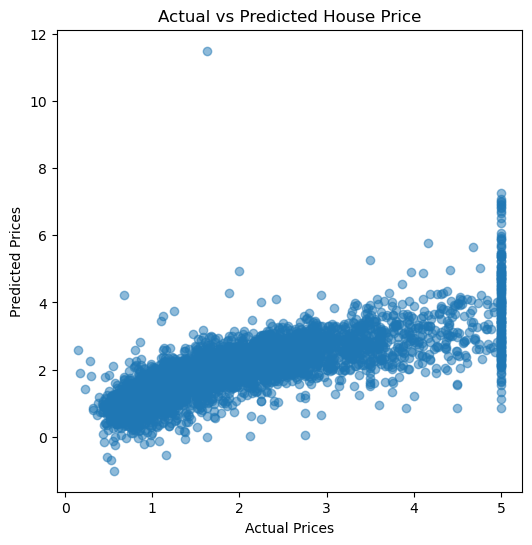

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

df.info()
df.describe()
df.isnull().sum()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()
X = df.drop("MedHouseVal",axis=1)
y = df["MedHouseVal"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE):",mae)
print("Root Mean Squared Error (RMSE):",rmse)
print("R2 Score:",r2)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Price")
plt.show()